# **Assignment_0**

Assignment_0 **will not be graded**. We highly recommend you to run this notebook, so you can get familiar with the basic concepts of graph mining.

In this notebook, we will introduce [NetworkX](https://networkx.org/documentation/stable/)



# NetworkX Tutorial

NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and function of complex networks.

With NetworkX you can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, and much more.

Library documentation: <a>https://networkx.github.io/</a>

## Setup

In [1]:
# Upgrade packages
!pip install --upgrade scipy networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 757.8 kB/s eta 0:00:00a 0:00:01
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached numpy-1.26.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 2.5 MB/s eta 0:00:0000:0100:01
Using cached networkx-3.2.1-py3-none-any.whl (1.6 MB)
Using cached numpy-1.26.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)


In [3]:
# Import the NetworkX package
import networkx as nx

## Graph
NetworkX provides several classes to store different types of graphs, such as directed and undirected graph. It also provides classes to create multigraphs (both directed and undirected).

For more information, please refer to [NetworkX graph types](https://networkx.org/documentation/stable/reference/classes/index.html).

In [4]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

# Add graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)

False
True
{'Name': 'Bar'}


## Node

Nodes (with attributes) can be easily added to NetworkX graphs.

In [ ]:
# Add one node with node level attributes
G.add_node(0, feature=5, label=0)

# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

In [ ]:
G.nodes(data=True)

In [5]:
# Add multiple nodes with attributes
G.add_nodes_from(
    [(1, {"feature": 1, "label": 1}), (2, {"feature": 2, "label": 2})]
)  # (node, attrdict)

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
    print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 2 nodes


## Edge

Similar to nodes, edges (with attributes) can also be easily added to NetworkX graphs.

In [6]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [7]:
# Add multiple edges with edge weights
G.add_edges_from([(1, 2, {"weight": 0.3}), (2, 0, {"weight": 0.1})])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
    print(edge)

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(1, 0)
(1, 2)
(2, 0)
G has 3 edges


## Visualization
NetworkX also provides tooling to conventiently visualize graphs. Not recommended to use NetworkX for large-scale graphs.
If you want the node labels to be visible in your drawing, just add `with_labels=True` to the `nx.draw call`.

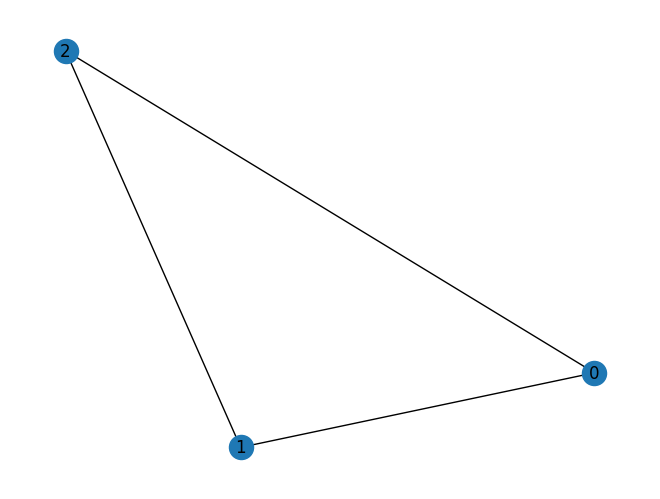

In [9]:
# Draw the graph
nx.draw(G, with_labels=True)

## Node Degree and Neighbor

In [10]:
node_id = 1

# Degree of node 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 1
for neighbor in G.neighbors(node_id):
    print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


In [11]:
# can also remove or clear
G.remove_node(0)
G.clear()
print(G.graph)

{}


In [12]:
nx.path_graph(num_nodes)

## Draw methods
You can draw the graph using two drawing methods: `draw()` and `draw_networkx()`. With `draw()` you can draw a simple graph with no node labels or edge labels and using the full Matplotlib figure area and no axis labels by default, while `draw_networkx()` allows you to define more options and customize your graph.

For more information, please refer to [Drawing](https://networkx.org/documentation/stable/reference/drawing.html)

Let's say we defined a complete bipartite graph as below:

In [13]:
K33 = nx.complete_bipartite_graph(3, 3)

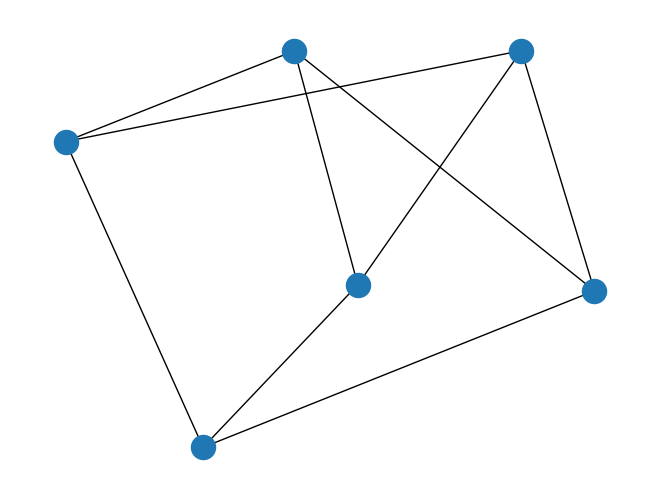

In [14]:
nx.draw(K33)

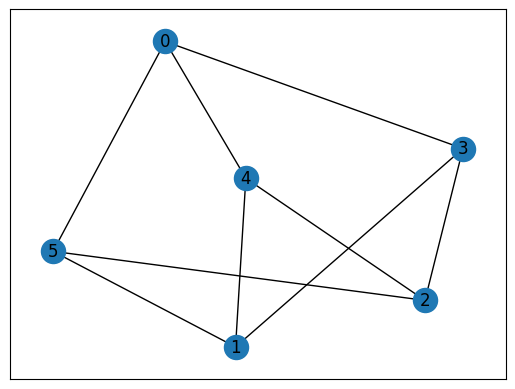

In [15]:
nx.draw_networkx(K33)

## Layouts

Graph layout will define node position for your graph drawing. There are a bunch of predefined layouts in NetworkX. The default one is called `spring_layout()` which poistions nodes using Fruchterman-Reingold force-directed algorithm.

Let's show the basic usage of graph layouts on a simple graph example.

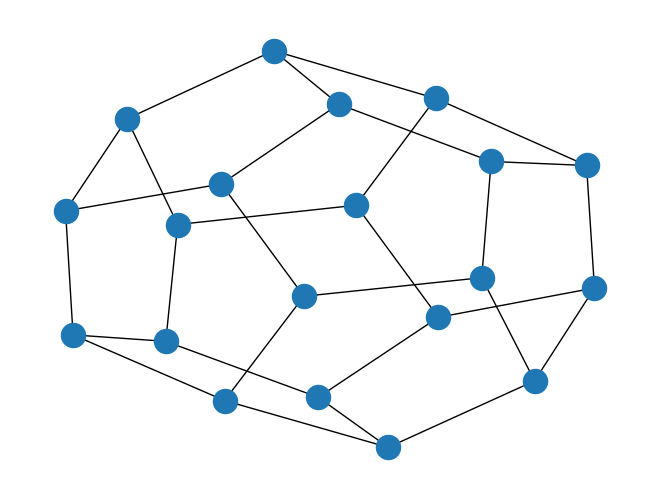

In [16]:
G = nx.dodecahedral_graph()
nx.draw(G)

Since we did not define any layout above, the default `spring_layout()` will be used.

If we want to draw the same graph with the `shell_layout()` that positiones nodes in concentric circles, we would use the following code:

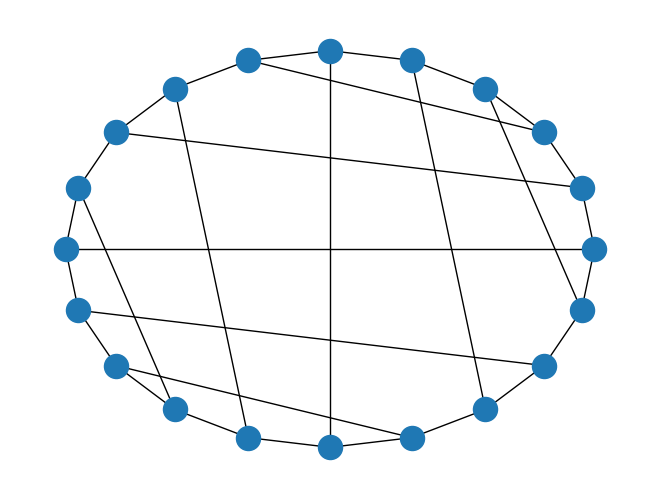

In [17]:
nx.draw(G, pos=nx.shell_layout(G))

For `spiral_layout()` run:

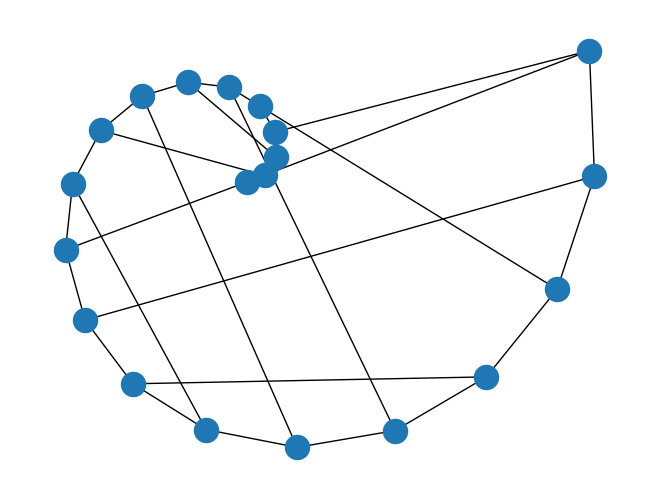

In [18]:
nx.draw(G, pos=nx.spiral_layout(G))

## Other examples
You can draw a panel with graphs by `plt.subplot()` from `matplotlib.pyplot`

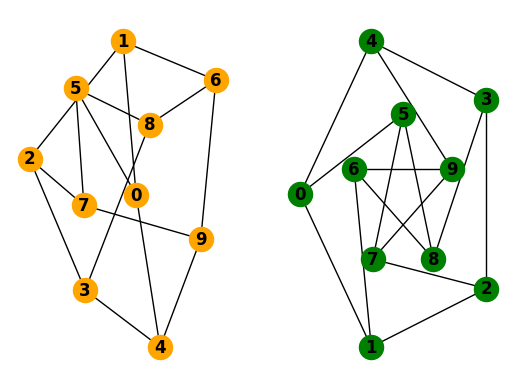

In [19]:
import matplotlib.pyplot as plt

G = nx.petersen_graph()
plt.subplot(121)

nx.draw(G, with_labels=True, font_weight="bold", node_color="orange")
plt.subplot(122)

nx.draw_shell(
    G,
    nlist=[range(5, 10), range(5)],
    with_labels=True,
    font_weight="bold",
    node_color="green",
)

plt.show()

### How to draw directed graphs using NetworkX?
By using the base class for directed graphs, `DiGraph()`, we are able to draw a directed graph with arrows to indicate the direction of edges.

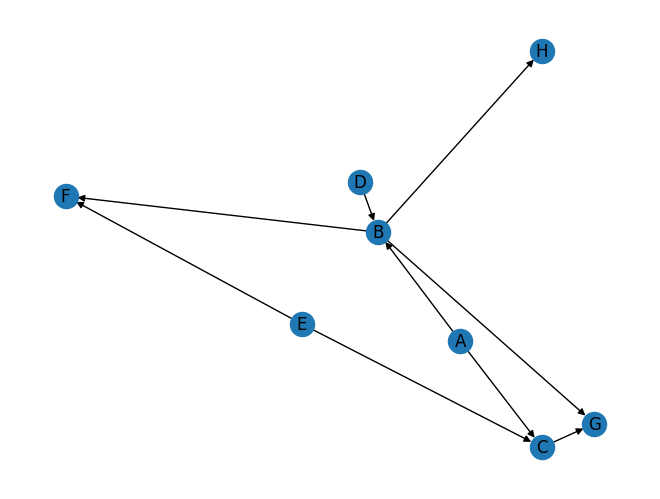

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [
        ("A", "B"),
        ("A", "C"),
        ("D", "B"),
        ("E", "C"),
        ("E", "F"),
        ("B", "H"),
        ("B", "G"),
        ("B", "F"),
        ("C", "G"),
    ]
)

nx.draw(G, with_labels=True)

### How to change the color and width of edges in NetworkX graphs according to edge attributes?

Dictionaries are the underlying data structure used for NetworkX graphs, and as of Python 3.7+ they maintain insertion order. You can use the `nx.get_edge_attributes()` function to retrieve edge attributes. For every run, we are guaranteed to have the same edge order.

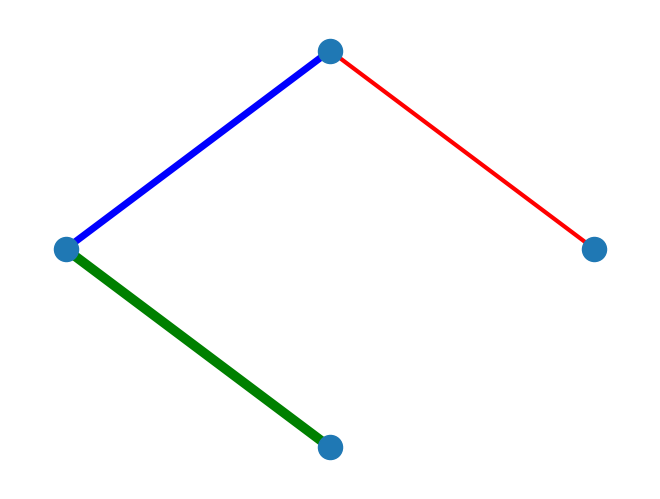

In [21]:
G = nx.Graph()
G.add_edge(1, 2, color="r", weight=3)
G.add_edge(2, 3, color="b", weight=5)
G.add_edge(3, 4, color="g", weight=7)

pos = nx.circular_layout(G)

colors = nx.get_edge_attributes(G, "color").values()
weights = nx.get_edge_attributes(G, "weight").values()

nx.draw(G, pos, edge_color=colors, width=list(weights))

## Documentation

You can explore more NetworkX functions through its [documentation](https://networkx.org/documentation/stable/).